<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 4 (Group 5) - Multi-Classification of Stroke, Mild Stroke and No Stroke

> Authors: Suen Si Min, Lee Hongwei, Irfan (Group 5)
---

**Problem Statement:**  
How might we help patients confidently assess if they experienced a mild stroke, using a precise and sensitive classification model?

There are a total of four notebooks for this project:  
 1. `01_Data_Cleaning_EDA.ipynb`   
 2. `02_Modelling_Evaluation.ipynb`   
 3. `03_Clustering_Reclassification.ipynb`
 4. `04_Cluster_Exploration_Conclusion.ipynb`

---
**This Notebook**
- Explore the differences between attributes of the 3 newly formed clusters
- Explore the similarities between data points within each cluster
- Summary of limitations, recommendations and potential cost-benefit analysis

---

<h1> 1. Data Analysis </h1>


<h2> 1.1 Import Libraries and Dataset </h2>

In [ ]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
# Import the newly labeled dataset

clusters = pd.read_csv('../datasets/wrongly_classified_clusters.csv')

In [ ]:
# Check output

clusters.head()

,diabetes_012,highbp,highchol,bmi,smoker,heartdiseaseorattack,physactivity,fruits,veggies,hvyalcoholconsump,...,nodocbccost,genhlth,menthlth,physhlth,diffwalk,sex,age,education,income,kmeans_cluster
0,0,0,1,33,1,0,1,0,1,0,...,1,4,30,28,0,0,4,6,2,1
1,0,1,1,49,1,0,0,1,1,0,...,0,3,15,1,0,0,9,6,6,1
2,0,0,0,26,1,0,1,1,1,0,...,0,1,0,0,0,0,9,5,6,2
3,0,1,0,31,0,0,0,1,1,0,...,0,3,0,0,0,1,10,4,6,2
4,0,1,1,34,1,0,1,0,1,0,...,0,2,0,0,0,1,7,6,7,2


In [ ]:
# Import original wrongly classified dataset

wrong_class = pd.read_csv('../datasets/wrongly_classified_labeled.csv')

In [ ]:
# Check output

wrong_class.head()

,diabetes_012,highbp,highchol,bmi,smoker,stroke,heartdiseaseorattack,physactivity,fruits,veggies,...,nodocbccost,genhlth,menthlth,physhlth,diffwalk,sex,age,education,income,pred_stroke
0,0,0,1,33,1,1,0,1,0,1,...,1,4,30,28,0,0,4,6,2,0
1,0,1,1,49,1,1,0,0,1,1,...,0,3,15,1,0,0,9,6,6,0
2,0,0,0,26,1,1,0,1,1,1,...,0,1,0,0,0,0,9,5,6,0
3,0,1,0,31,0,1,0,0,1,1,...,0,3,0,0,0,1,10,4,6,0
4,0,1,1,34,1,1,0,1,0,1,...,0,2,0,0,0,1,7,6,7,0


In [ ]:
# Add actual target stroke values to cluster dataframe

clusters['stroke'] = wrong_class['stroke'] # Index is sorted the same way

In [ ]:
# Check output

clusters.head()

,diabetes_012,highbp,highchol,bmi,smoker,heartdiseaseorattack,physactivity,fruits,veggies,hvyalcoholconsump,...,genhlth,menthlth,physhlth,diffwalk,sex,age,education,income,kmeans_cluster,stroke
0,0,0,1,33,1,0,1,0,1,0,...,4,30,28,0,0,4,6,2,1,1
1,0,1,1,49,1,0,0,1,1,0,...,3,15,1,0,0,9,6,6,1,1
2,0,0,0,26,1,0,1,1,1,0,...,1,0,0,0,0,9,5,6,2,1
3,0,1,0,31,0,0,0,1,1,0,...,3,0,0,0,1,10,4,6,2,1
4,0,1,1,34,1,0,1,0,1,0,...,2,0,0,0,1,7,6,7,2,1


<h2> 1.2 Explore the data </h2>

<h3> 1.2.1 Cluster labels vs Actual values

If we were able to distinctively identify our three clusters: 'Stroke', 'No Stroke' or 'Mild Stroke (TIA)', two of our clusters should match the actual values of 'stroke'=0 and 'stroke'=1 respectively, while another cluster should have a mix of actual values.

We test this hypothesis below:

In [ ]:
# Find the proportion of each cluster to the dataset

clusters['kmeans_cluster'].value_counts(normalize=True)

kmeans_cluster
2    0.634221
1    0.322902
0    0.042877
Name: proportion, dtype: float64

In [ ]:
# Refer to the original 'wrongly classified' dataset to find the balance between actual and non actual stroke

# Calculate the total count of each combination of 'kmeans_cluster' and 'stroke'
counts = clusters.groupby(['kmeans_cluster', 'stroke']).size().unstack(fill_value=0)

# Calculate the percentage for each combination
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# Display the percentages
print("Percentage of 'kmeans_cluster' values corresponding to 'stroke' values:")
print("% of Cluster 2 within Stroke 1:", percentages.loc[2, 1])
print("% of Cluster 1 within Stroke 1:", percentages.loc[1, 1])
print("% of Cluster 0 within Stroke 1:", percentages.loc[0, 1])
print("% of Cluster 2 within Stroke 0:", percentages.loc[2, 0])
print("% of Cluster 1 within Stroke 0:", percentages.loc[1, 0])
print("% of Cluster 0 within Stroke 0:", percentages.loc[0, 0])

Percentage of 'kmeans_cluster' values corresponding to 'stroke' values:
% of Cluster 2 within Stroke 1: 57.898109580262734
% of Cluster 1 within Stroke 1: 13.215859030837004
% of Cluster 0 within Stroke 1: 45.497630331753555
% of Cluster 2 within Stroke 0: 42.101890419737266
% of Cluster 1 within Stroke 0: 86.78414096916299
% of Cluster 0 within Stroke 0: 54.502369668246445


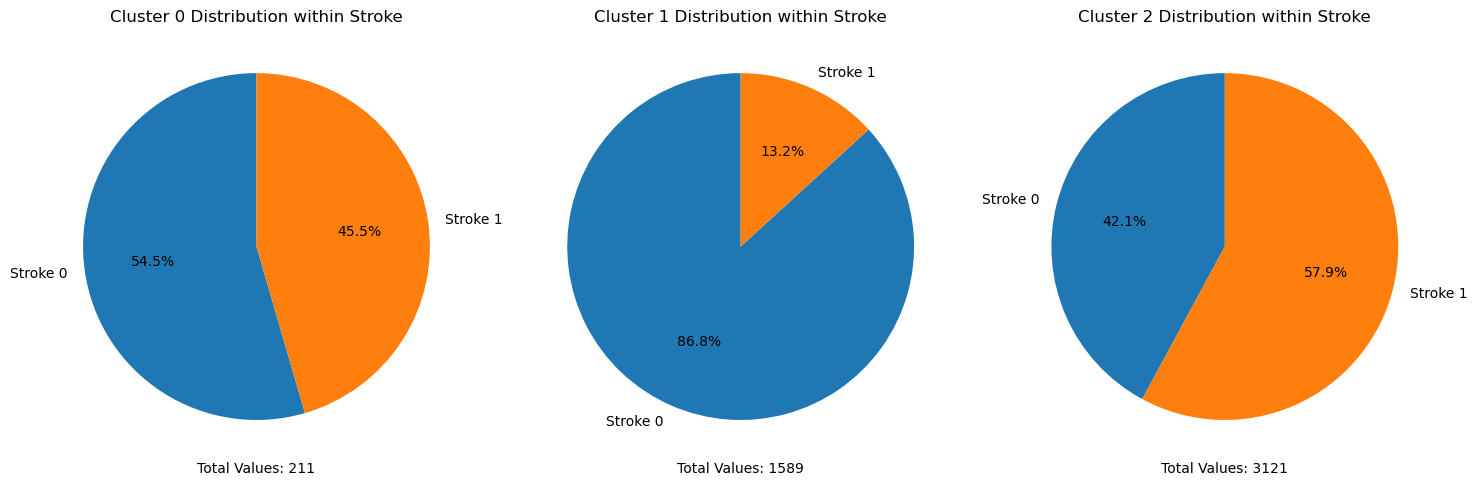

In [ ]:
# Create a figure with a single row and three columns
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot pie charts for each cluster
for cluster in range(3):
    # Extract percentages for stroke 1 and stroke 0 for the current cluster
    cluster_percentages = percentages.loc[cluster]

    # Plot the pie chart in the corresponding subplot
    axs[cluster].pie(cluster_percentages, labels=['Stroke 0', 'Stroke 1'], autopct='%1.1f%%', startangle=90)
    axs[cluster].set_title(f'Cluster {cluster} Distribution within Stroke')

    # Calculate and display the total count of values within the cluster
    total_values = counts.loc[cluster].sum()
    axs[cluster].text(0, -1.3, f'Total Values: {total_values}', ha='center', fontsize=10)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

**Interpretation:**
- 86.8% of cluster 1 matched with actual values of 'stroke' = 0, this suggests that we could have a no stroke cluster created.
- However clusters 0 and 2 have no clear majority match with 'stroke'=1, which does not help us in identifying a full stroke and mild stroke distinction.

<h3> 1.2.2 Summary Statistics - mean of each feature across clusters </h3>

In [ ]:
# examine average characteristic differences between the clusters
clusters.groupby('kmeans_cluster').mean().T

kmeans_cluster,0,1,2
diabetes_012,0.473934,0.750787,0.320410
highbp,0.620853,0.687854,0.608138
highchol,0.440758,0.602895,0.541814
bmi,30.236967,31.074261,27.495354
smoker,0.563981,0.607930,0.499519
heartdiseaseorattack,0.161137,0.230334,0.134893
physactivity,0.606635,0.466331,0.818648
fruits,0.530806,0.558842,0.679590
veggies,0.739336,0.684707,0.824736
hvyalcoholconsump,0.071090,0.028320,0.056713


**Interpretation:**
- No significant distinction on diabetic status across clusters, as it mostly falls within the no diabetes (0) to prediabetes (1) range.
- No significant distinction between bp, which is a key factor of stroke
- No significant distinction between chol, which is a key factor of stroke
- No significant distinction between smoker status, which is a key factor of stroke
- Cluster 2 has almost 2X more physical activity (1 if did in past 30 days)
- Cluster 1 had average of 15/30 days where they felt physically unwell, as compared to a minimal 9 average days for cluster 0 and 2 average days for cluster 2.
- Clusters 1 and 2 are about 10 to 15 years older on average than cluster 0

While cluster 2 had more physical activity, they are also older than the other clusters. Based purely on physical activity and age alone which are the more distinct features, we cannot conclude and label the clusters as No Stroke, Mild Stroke (TIA) and Stroke.

<h3> 1.2.3 Summary Statistics - standard deviation of each feature across clusters </h3>

In [ ]:
# examine standard deviation differences between the clusters
clusters.groupby('kmeans_cluster').std().T

kmeans_cluster,0,1,2
diabetes_012,0.835540,0.950710,0.717365
highbp,0.486329,0.463515,0.488244
highchol,0.497659,0.489452,0.498328
bmi,6.846672,6.913337,4.916683
smoker,0.497069,0.488366,0.500080
heartdiseaseorattack,0.368532,0.421179,0.341664
physactivity,0.489658,0.499022,0.385371
fruits,0.500237,0.496682,0.466709
veggies,0.440041,0.464779,0.380254
hvyalcoholconsump,0.257586,0.165937,0.231330


**Interpretation:**
Other than looking at the mean of each feature across clusters, we also want to look into the standard deviation. If we see that there are significant differences across the mean values, and very low standard deviation, it suggests that there are distinct differences within this feature of each cluster.

- Cluster 2 had a 2X higher mean than the other clusters for physical activity, while it also had a lower standard deviation. This shows that cluster 2 is more active than the other clusters.
- Cluster 1 have the highest average days of feeling physically unwell, however it also had the highest spread (standard deviation) of data
- While cluster 1 and 2 are about 10 to 15 years older than cluster 0, its standard deviation are roughly the same.

---

<h1> 2. Limitations and Recommendations </h2>

**Limitations**

Binary Data:
- Binary features formed the bulk of our dataset.
- Too many binary features limit the performance of clustering algorithms
- Some of these features are:
    - Blood Pressure
    - Cholesterol
    - Heart Disease
    - Heavy Alcohol Consumption

Data Collection:
- The data in our dataset were collected via tele-surveys.
- It is not easy to get continuous variables for the aforementioned features (e.g. asking the surveyee to perform a blood pressure test at home, obtaining their cholesterol levels)

Data Formats:
- Deeper analysis can't be done on stroke/TIA patients without images.

<br>

**Recommendations**

Continuous Data:
- Collect data from patients who have stroke and no stroke, with continuous variables for key features such as systolic/diastolic values for blood pressure, and mg/dL values for cholesterol levels.
- Have continuous data on current categorical features (e.g. income, age, education). More details/more granular the data, the better the analysis.

Data Collection:
- These data could be collected in clinics in the presence of medical professionals and stored when there are stroke or TIA-like symptoms

Data Formats:
- Deeper analysis can be done on stroke/TIA patients such as CT scans and carotid ultrasound scans.
- These images can be saved for each patient and we can train image recognition models to identify TIA.
- This means that data can be processed by identifying surveyee to their CT or Carotid ultrasound scans (if available) and execute image recognition prediction models
- Thus, patient's data is stored alongside their scan results for future analysis

---

<h1> 3. Cost-Benefit Analysis </h1>


While we were not able to create a model that helps to predict the likelihood of TIA, we believe that if we are able to overcome the limitations mentioned earlier, we will be able to create a model that meets our objective.

Most importantly, we need to understand that the cost of creating this model is minimal compared to the millions of lives saved in stroke prevention, and billions of dollars on our healthcare system.

### **3.1 Country Level**

**Cost 1:** Implementation and Maintenance
- Estimated cost of a single feature healthcare app development is around USD 60,000 to USD 150,000. The source can be found in this [link](https://infostride.com/healthcare-app-development-cost-in-2024/).
- In addition, there are costs that have to be incurred for maintenance of the app.

**Cost 2:** Wrong Prediction
- In 2016, a Blood Pressure predictor app by Aura Labs paid the Federal Trade Commission around USD 600,000 for publicising an inaccurate app. The source can be found in this [link](https://www.ftc.gov/news-events/news/press-releases/2016/12/marketers-blood-pressure-app-settle-ftc-charges-regarding-accuracy-app-readings). With that, predictor models tend to make some wrong predictions. If the impact on the public is severe, it can lead to complaints by the members of the public. Thus, incurring costs on the company or government organisation.

**Benefit 1:** Employment Productivity
- By preventing stroke, we are able to indirectly save costs from underemployment and premature death. The estimated cost savings is USD 68.5 billion, as mentioned in this [link](https://www.jns-journal.com/article/S0022-510X(19)32408-6/abstract).

**Benefit 2:** Medical Resource Allocation
- By preventing stroke, we are also able to save on stroke care and rehabilitation.
- The average healthcare cost of stroke per person, including inpatient care, rehabilitation, and follow-up care, is estimated at USD 140,048 in the United States. Source can be found in this [link](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8307880/).
- The estimated number of people who experienced a stroke preceded by TIA is [20%](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6604401/) of about [800,000](https://www.cdc.gov/stroke/facts.htm), which calculates to about 160,000.
- Therefore, the total healthcare cost for all stroke patients is USD 22.4 billion, which is a very large amount.

### **3.2 Individual Level**

**Cost 1:** Implementation of Stroke Prevention for TIA patients

- Personal health data would need to be collected for model training.
- This requires us to obtain permission from every individual (time is spent doing so), adhere to local guidelines on personal data protection, and also have secured systems in place to ensure their data will be securedly stores.

**Cost 2:** Inaccurate prediction of TIA

- If the prediction of TIA is inaccurate, and a full stroke ensues, an individual can potentally lose 2 million brain cells every minute if left unattended.
    - Devastating [Impacts](https://www.stroke.org/en/about-stroke/types-of-stroke/tia-transient-ischemic-attack) of Stroke:
        - Speech/language problems
        - Vision problems
        - Slow, cautious / Quick, inquisitive behavioral style
        - Memory loss
        - Paralysis on one side of the body
        - Death
    - Other than death, the impacts of stroke bring huge daily inconveniences to the basic lifestyle of a patient. Daily tasks such as getting around, cooking and bathing may be more difficult than before. The source can be found in this [link](https://www.stroke.org.uk/stroke/life-after/equipment-independent-living).


**Benefit 1:** Costs saved with stroke prevention

- Total annual amount spent by TIA patients in USA is about USD3.86 Billion (calculated by obtaining data from [here](https://www.cdc.gov/stroke/facts.htm), [here](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6604401/), and [here](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4544732/#:~:text=Results,%2432%2C046%2C%20and%20%2419%2C248%20%C2%B1%20%2421%2C703.). This equates to about USD 24,000 per year, that an individual can save on stroke-related medical costs.

**Benefit 2:** Psychological Benefits
- As a full stroke negatively affects the brain & mood, preventing it from happening improves brain & mental health
- Reduces a person's anxiety of diagnosis that usually happens when one is unable to know whether it is a TIA
- Certainty in the correct treatment being received by a patient puts them at ease

---

<h1> 4. Conclusion </h1>


In the previous notebooks, our objective was to identify patients who potentially had a Mild Stroke (TIA). Our process is documented briefly as below:

1. Data Preprocessing and Analysis - We retrieved data from [Kaggle](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset), researched and selected key features that had a relationship with stroke occurence.
2. Classification Modelling - Ran through 6 supervised learning, classification models to select and hypertune 3 based on F1 score (to improve number of correct predictions), before extracting a dataset of wrong predictions for clustering.
3. Clustering Algorithm - Performed 3 clustering algorithms on a dataset of wrongly classified data points from the previous classification model to identify 3 clusters.
4. Multi-Class Predictor - While we were not able to identify 3 distinct clusters, this is what we originally aimed to achieve at the end of the project with the new cluster labels.

Despite the limitations above that eventually posed as a barrier to reach our goal, we believe that there is still value in creating a precise and sensitive multi-class predictor to identify mild stroke as a means to prevent future strokes. The benefits majorly outweighs the cost, both for our citizens and our country as a whole.